
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


##Filtrado de los datos



In [ ]:
# df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()
selected_columns = ['profile_gender', 'salary_monthly_NETO']
df = df[selected_columns]
df.describe()

,salary_monthly_NETO
count,5.883000e+03
mean,9.490795e+04
std,9.686226e+04
min,1.000000e+00
25%,5.148000e+04
50%,7.800000e+04
75%,1.060000e+05
max,2.080000e+06


Realizamos una limpieza de los valores fuera del rango intercuartilico

In [ ]:
#Funcion para limpiar los outliers fuera del rango intercuartilico.

def clean_outliers(df):

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]

In [ ]:
# Aplicamos la funcion para eliminar los outliers
df = clean_outliers(df)
# Eliminamos las filas con valores nulos y reindexamos la base de datos
df.dropna(inplace=True)
df.reset_index(level=-1, drop=True)
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


,salary_monthly_NETO
count,5490.000000
mean,76452.954566
std,37178.636695
min,1.000000
25%,50000.000000
50%,74000.000000
75%,100000.000000
max,187000.000000


In [ ]:
df.groupby('profile_gender').describe()

salary_monthly_NETO                                             \
                             count          mean           std   min      25%   
profile_gender                                                                  
Hombre                      4576.0  78163.490217  37287.784011   1.0  51000.0   
Mujer                        887.0  67907.449080  35161.185184   2.0  43477.5   
Otros                         27.0  67284.518519  44023.825723  40.0  39000.0   

                                             
                    50%       75%       max  
profile_gender                               
Hombre          75290.5  100000.0  187000.0  
Mujer           64000.0   90000.0  178951.0  
Otros           54000.0   95400.0  175000.0

Ploteamos diagramas de caja de las variables de interés (género y salario neto) para poder visualizar mejor los estadisticos.

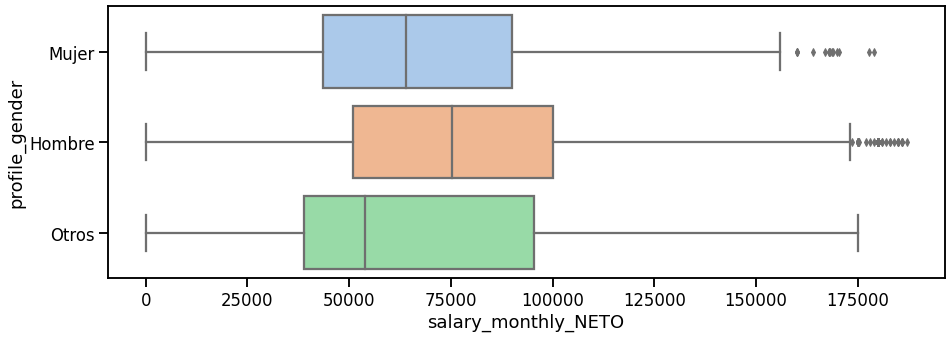

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(15, 5))
colors = seaborn.color_palette('pastel')[0:5]
seaborn.boxplot(x='salary_monthly_NETO', y='profile_gender', data=df, palette=colors)

Vemos en nuestro dataset una clara tendencia de un mayor sueldo en el grupo de hombre.

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 

¿Cómo se relaciona este intervalo de confianza con el test de hipótesis? (Responder)

La **Test de hipotesis** para la diferencia de medias es utilizada cuando se quiere determinar el nivel de similitud o diferencia entre los valores de la media de una variable de interés de dos poblaciones bajo estudio. El intervalor de confianza es una herramienta que nos definirá el nivel de tolerancia que tendrá nuestro modelo.

Creamos dos grupos a estudiar que van a ser la poblacion que no cumple con el requisito de ser hombre y una muestra del mismo tamaño de la poblacio que si lo cumple. Aplicamos un filtro mas que es que el sueldo sea mayor a $15.000 ya que valores menores no tendrian logica o responderian a variables que no estamos analizando.

In [ ]:
#Definimos en una variable la condicion de cumplir con el requisito de ser hombre
is_man = df.profile_gender.isin(['Hombre'])

#Grupo no hombres
groupB = df[(df.salary_monthly_NETO > 15000) & ~is_man].salary_monthly_NETO

#Grupo hombres - Se iguala el tamaño de las muestras con la funcion sample.
groupA = df[(df.salary_monthly_NETO > 15000) & is_man].salary_monthly_NETO.sample(n=len(groupB))


Ploteamos los estadisticos de cada muestra para poder analizar los datos de cada grupo.

In [ ]:
round(groupA.describe(),2)

count       855.00
mean      82022.69
std       34521.09
min       16600.00
25%       55000.00
50%       79465.00
75%      101720.00
max      185000.00
Name: salary_monthly_NETO, dtype: float64

In [ ]:
round(groupB.describe(),2)

count       855.00
mean      72435.06
std       31933.67
min       15600.00
25%       48000.00
50%       67000.00
75%       92000.00
max      178951.00
Name: salary_monthly_NETO, dtype: float64

Observamos la información que las agrupaciones groupA y groupB nos arrojan:

In [ ]:
groupA.describe().apply(lambda s: '{0:.2f}'.format(s))

count       855.00
mean      82022.69
std       34521.09
min       16600.00
25%       55000.00
50%       79465.00
75%      101720.00
max      185000.00
Name: salary_monthly_NETO, dtype: object

Ploteamos un histograma donde superponemos ambos grupos para comprar a distribucion de sueldos netos.

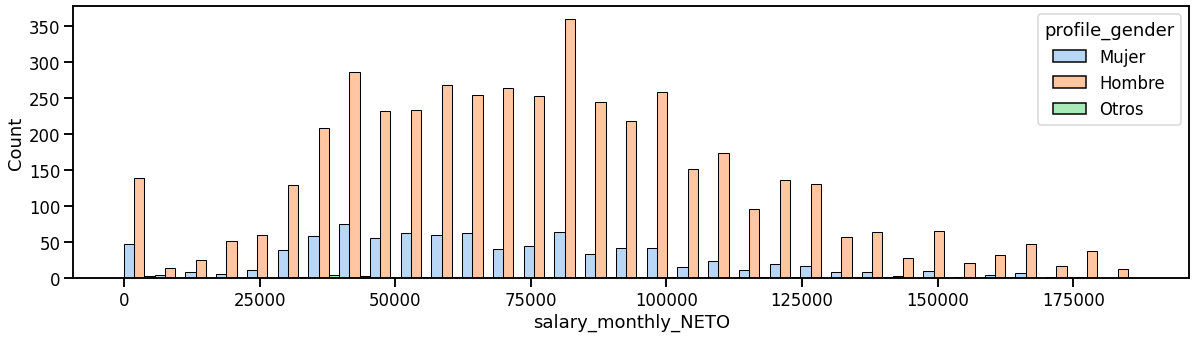

In [ ]:
#graficos 
fig = plt.figure(figsize=(20, 5))
chart = seaborn.histplot(data=df, x="salary_monthly_NETO", hue="profile_gender", multiple="dodge", palette=seaborn.color_palette('pastel')[0:3])

Podemos ver en el grafico una clara tendencia de mayor frecuencia de sueldos altos en la muestra de hombres.

### Se procede a responder a la consigna: 

Nuestra variable de interés es el salario mensual neto. Se estudia dicha variable para dos grupos distintos ARRIBA definidos como: groupA  y  groupB 

Dado que trabajamos con muestras y no con la población, a pesar que en ambos grupos el n > 30, el parametro varianza poblacional no es conocido, por lo que vamos a utilizar T Student.


In [ ]:
#Estimación Puntual

nA= len(groupA)
nB= len(groupB)
mA= groupA.mean()
mB= groupB.mean()
stdA= groupA.std()
stdB= groupB.std()

print('GroupA: Es Hombre')
print('Muestra: ' , nA)
print('Media del Salario Neto: ' , round(mA,2))
print('Des. Est.: ' , round(stdA,2))
print()

print('GroupB: No es hombre')
print('Muestra: ' , nB)
print('Media del Salario Neto: ' ,  round(mB,2))
print('Des. Est.: ' ,  round(stdB,2))
print()

print('La diferencia de las medias es: ' ,  round(mA-mB))


GroupA: Es Hombre
Muestra:  855
Media del Salario Neto:  82022.69
Des. Est.:  34521.09

GroupB: No es hombre
Muestra:  855
Media del Salario Neto:  72435.06
Des. Est.:  31933.67

La diferencia de las medias es:  9588


Se toma un **alpha** de 0.05

In [ ]:
alpha = 0.05

In [ ]:
#Intervalo de confianza.

confidence = 0.95
import math
from scipy import stats as stats

#Se calculan los limites.

hA = stdA /math.sqrt(nA) * stats.t.ppf((1 - confidence), nA - 1)
hB = stdB /math.sqrt(nB) * stats.t.ppf((1 - confidence), nB - 1)

#Se imprime la suma/resta de la media y los valores calculados.

print('Intervalo de confianza (derecho) groupA: ', round(mA + hA,2))
print('Intervalo de confianza (izquierdo) groupA: ', round(mA - hA,2))
print('Intervalo de confianza (derecho) groupB: ', round(mB + hB,2))
print('Intervalo de confianza (izquierdo) groupB: ', round(mB - hB,2))

Intervalo de confianza (derecho) groupA:  80078.67
Intervalo de confianza (izquierdo) groupA:  83966.71
Intervalo de confianza (derecho) groupB:  70636.75
Intervalo de confianza (izquierdo) groupB:  74233.37


Recordemos que el test de T de student tiena distribución que tiende hacia uno de los lados. Podemos ver los intervalos de confianza para ambos lados en cada grupo.

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


Un test de hipótesis para dos muestras es similar en muchos aspectos al test para una muestra.

• Se especifica una hipótesis y una hipótesis nula:

#### **H0: Las medias de las dos poblaciones son iguales**
#### **H1: Las medias de las dos poblaciones no son iguales**

Se especifica un nivel de significación α, en este caso tomaremos la propuesta por el ejercicio. 

α = 0.05.

Se calcula el p-valor, este nos dice la probabilidad de obtener datos cuyas medias muestrales difieren tanto o más que la diferencia observada cuando H0 es verdadera. Si la probabilidad es pequeña (menor que α ) se rechaza H0 y se concluye que la diferencia observada no es atribuible al azar y las medias de las dos poblaciones son diferentes. 

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Se utiliza la libreria Scipy para realizar el test. En este caso esta función es una prueba para la hipótesis nula de que 2 muestras independientes tienen valores promedio (esperados) idénticos. Esta prueba asume que las poblaciones tienen varianzas idénticas por defecto.

In [ ]:
print("Varianza grupo A: ", round(numpy.var(groupA),2))
print("Varianza grupo B: ", round(numpy.var(groupB),2))

Varianza grupo A:  1190311965.06
Varianza grupo B:  1018566491.59


In [ ]:
#Se aclara que las varianzas no son iguales.
stats.ttest_ind(groupA, groupB, equal_var=False)

Ttest_indResult(statistic=5.961483886495306, pvalue=3.03373060381861e-09)

El estadistico **"Statistics"** es la relacion entre la salida de un valor estimado de un parametro desde su valor hipotetico a su error estandar 

El **"P value"** representa el area de la cola del T student, al resultar menor a 0.05, se concluye que existe una diferencia estadistica significativa entre ambos parametros.

**Se rechaza H0**